In [1]:
from utils import *
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten , Dense , Input , Dropout , BatchNormalization, GlobalAveragePooling2D

2025-05-06 03:19:42.231411: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-06 03:19:42.275679: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746497982.323686   12382 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746497982.337892   12382 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746497982.374166   12382 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
print(physical_devices)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
IMG_SIZE = (512,384)
early_stopping = EarlyStopping(monitor='accuracy', patience=20)

In [ ]:
def model_resnet_pretrained(size:tuple[int,int],fine_tune_amt:int=0):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(size[0], size[1], 3))
    for layer in base_model.layers:
        layer.trainable = False
        
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    predictions = Dense(6, activation='softmax')(x)
    
    model = Model(inputs=base_model.input, outputs=predictions)
    
    if fine_tune_amt > 0:
        for layer in base_model.layers[-fine_tune_amt:]:
            layer.trainable = True
            
    return model

In [ ]:
model_resnet_pretrained1 = MModel('model_resnet_pretrained1')
model_resnet_pretrained1.set_model(model_resnet_pretrained(IMG_SIZE))
model_resnet_pretrained1.summary()

In [ ]:
model_resnet_pretrained1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_resnet_pretrained1.fit(epochs=300, verbose=1, callbacks=[early_stopping])

In [ ]:
model_resnet_pretrained1.evaluate()

In [ ]:
model_resnet2 = MModel('model_resnet2')
model_resnet2.set_model(model_resnet_pretrained(IMG_SIZE,fine_tune_amt=2000))
model_resnet2.summary()

In [ ]:
model_resnet2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_resnet2.fit(epochs=300, verbose=1, callbacks=[early_stopping])

In [ ]:
model_resnet2.evaluate()

In [4]:
from tensorflow.keras.applications import Xception

def xception_pretrained(IMG_SIZE, fine_tune_amt=0):
    xception = Xception(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
    for layer in xception.layers:
        layer.trainable = False
        
    x = xception.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    predictions = Dense(6, activation='softmax')(x)
    
    model = Model(inputs=xception.input, outputs=predictions)
    
    if fine_tune_amt > 0:
        for layer in xception.layers[-fine_tune_amt:]:
            layer.trainable = True
            
    return model

In [ ]:
xception_pretrained1 = MModel('xception_pretrained1')
xception_pretrained1.set_model(xception_pretrained(IMG_SIZE,fine_tune_amt=2000))
xception_pretrained1.summary()

In [ ]:
xception_pretrained1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = xception_pretrained1.fit(epochs=300, verbose=1, callbacks=[early_stopping])

In [ ]:
xception_pretrained1.evaluate()

In [ ]:
from tensorflow.keras.applications import EfficientNetB0

def efficientnetb0_pretrained(IMG_SIZE, fine_tune_amt=0):
    efficientnetb0 = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
    for layer in efficientnetb0.layers:
        layer.trainable = False
        
    x = efficientnetb0.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    predictions = Dense(6, activation='softmax')(x)
    
    model = Model(inputs=efficientnetb0.input, outputs=predictions)
    
    if fine_tune_amt > 0:
        for layer in efficientnetb0.layers[-fine_tune_amt:]:
            layer.trainable = True
            
    return model

In [ ]:
efficientnetb0_pretrained1 = MModel('efficientnetb0_pretrained1')
efficientnetb0_pretrained1.set_model(efficientnetb0_pretrained(IMG_SIZE,fine_tune_amt=2000))
efficientnetb0_pretrained1.summary()

In [ ]:
efficientnetb0_pretrained1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = efficientnetb0_pretrained1.fit(epochs=300, verbose=1, callbacks=[early_stopping])

In [ ]:
efficientnetb0_pretrained1.evaluate()

In [ ]:
from tensorflow.keras.applications import MobileNetV2

def mobilenetv2_pretrained(IMG_SIZE, fine_tune_amt=0):
    mobilenetv2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
    for layer in mobilenetv2.layers:
        layer.trainable = False
        
    x = mobilenetv2.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    predictions = Dense(6, activation='softmax')(x)
    
    model = Model(inputs=mobilenetv2.input, outputs=predictions)
    
    if fine_tune_amt > 0:
        for layer in mobilenetv2.layers[-fine_tune_amt:]:
            layer.trainable = True
            
    return model

In [ ]:
mobilenetv2_pretrained1 = MModel('mobilenetv2_pretrained1')
mobilenetv2_pretrained1.set_model(mobilenetv2_pretrained(IMG_SIZE,fine_tune_amt=2000))
mobilenetv2_pretrained1.summary()

In [ ]:
mobilenetv2_pretrained1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = mobilenetv2_pretrained1.fit(epochs=300, verbose=1, callbacks=[early_stopping])

In [ ]:
mobilenetv2_pretrained1.evaluate()

In [ ]:
from tensorflow.keras.regularizers import l2

def mobilenetv2_pretrained_regularized(IMG_SIZE, fine_tune_amt=0, dropout_rate=0.3, l2_lambda=0.01):
    """
    Builds a MobileNetV2 model with pre-trained weights,
    including measures to prevent overfitting.

    Args:
        IMG_SIZE (tuple): A tuple representing the image size (height, width).
        fine_tune_amt (int): The number of top layers to fine-tune in the MobileNetV2 base.
        dropout_rate (float): The dropout rate to apply after the dense layer.
        l2_lambda (float): The L2 regularization parameter for the dense layer.

    Returns:
        keras.models.Model: The built and compiled model.
    """
    mobilenetv2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

    # Initially freeze all layers in the base model
    for layer in mobilenetv2.layers:
        layer.trainable = False

    # Add custom layers on top
    x = mobilenetv2.output
    x = GlobalAveragePooling2D()(x)

    # Add a Dense layer with L2 regularization
    x = Dense(256, activation='relu', kernel_regularizer=l2(l2_lambda))(x)

    # Add Dropout
    x = Dropout(dropout_rate)(x)

    # Output layer
    predictions = Dense(6, activation='softmax')(x)

    model = Model(inputs=mobilenetv2.input, outputs=predictions)

    # Unfreeze layers for fine-tuning if specified
    if fine_tune_amt > 0:
        # Ensure we don't try to unfreeze more layers than exist
        num_layers = len(mobilenetv2.layers)
        fine_tune_amt = min(fine_tune_amt, num_layers)
        for layer in mobilenetv2.layers[num_layers - fine_tune_amt:]:
            layer.trainable = True

    return model

In [ ]:
model_mobilenetv2_regularized = MModel('mobilenetv2_regularized')
model_mobilenetv2_regularized.set_model(mobilenetv2_pretrained_regularized(IMG_SIZE,fine_tune_amt=2000))
model_mobilenetv2_regularized.summary()

In [ ]:
model_mobilenetv2_regularized.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_mobilenetv2_regularized.fit(epochs=300, verbose=1, callbacks=[early_stopping])

In [ ]:
model_mobilenetv2_regularized.evaluate()

In [ ]:
IMG_SIZE = (128,128)
model_mobilenetv2_regularized2 = MModel("mobilenetv2_regularized2")
model_mobilenetv2_regularized2.set_model(mobilenetv2_pretrained_regularized(IMG_SIZE,fine_tune_amt=35, dropout_rate=0.2, l2_lambda=0.01))
model_mobilenetv2_regularized2.summary()

In [ ]:
model_mobilenetv2_regularized2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_mobilenetv2_regularized2.fit(epochs=300, verbose=1, callbacks=[early_stopping])

In [ ]:
model_mobilenetv2_regularized2.evaluate()

In [5]:
count = {}
for dir in os.listdir("train/"):
    count[dir] = len(glob.glob(os.path.join( "train/",dir, '*.jpg')))
    
total = sum(count.values())
class_weights = {cls: total / cnt for cls, cnt in count.items()}

from tensorflow.keras import backend as K
def weigthed_loss(class_weights):
    
    sorted_keys = sorted(class_weights.keys())
    weight_tensor = tf.constant([class_weights[k] for k in sorted_keys], dtype=tf.float32)
    
    def loss(y_true, y_pred):
        y_pred = tf.clip_by_value(
            y_pred,
            K.epsilon(),
            1 - K.epsilon()
        )
        y_true_class = tf.argmax(y_true, axis=-1)
        ce = -tf.reduce_sum(y_true * tf.math.log(y_pred), axis=-1)
        sw = tf.gather(weight_tensor, y_true_class)
        return tf.reduce_mean(sw * ce)
    
    return loss

weigthed_loss_func = weigthed_loss(class_weights)

I0000 00:00:1746498028.911219   12382 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13208 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4080 SUPER, pci bus id: 0000:01:00.0, compute capability: 8.9


In [ ]:
xception_2 = MModel("xception_2")
IMG_SIZE = (256,192)
xception_2.set_model(xception_pretrained(IMG_SIZE,fine_tune_amt=2000))
xception_2.compile(optimizer='adam', loss=weigthed_loss_func, metrics=['accuracy'])

In [ ]:
history = xception_2.fit(epochs=300, verbose=1, callbacks=[early_stopping])

In [ ]:
xception_2.evaluate()

In [ ]:
xception_2.summary()

In [33]:
from tensorflow.keras.applications import Xception

def xception_pretrained2(IMG_SIZE, fine_tune_amt=0):
    xception = Xception(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
    for layer in xception.layers:
        layer.trainable = False
        
    x = xception.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
    x = Dropout(0.3)(x)
    predictions = Dense(6, activation='softmax')(x)
    
    model = Model(inputs=xception.input, outputs=predictions)
    
    if fine_tune_amt > 0:
        for layer in xception.layers[-fine_tune_amt:]:
            layer.trainable = True
            
    return model

In [34]:
xception_3 = MModel('xception_3')
IMG_SIZE = (512,384)
xception_3.set_model(xception_pretrained2(IMG_SIZE,fine_tune_amt=2000))
xception_3.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 512, 384,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 255, 191,  │        864 │ input_layer_8[0]… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 255, 191,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 255, 191,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 253, 189,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 253, 189,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 253, 189,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 253, 189,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 253, 189,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 253, 189,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 253, 189,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 253, 189,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 127, 95,   │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 127, 95,   │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 127, 95,   │        512 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_24 (Add)        │ (None, 127, 95,   │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 127, 95,   │          0 │ add_24[0][0]    

 Total params: 21,387,566 (81.59 MB)

 Trainable params: 21,333,038 (81.38 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [35]:
xception_3.compile(optimizer='adam', loss=weigthed_loss_func, metrics=['accuracy'])
history = xception_3.fit(epochs=300, verbose=1, callbacks=[early_stopping])

(512, 384)
Found 2274 images belonging to 6 classes.
Found 253 images belonging to 6 classes.


/mnt/c/Users/kkiko/Desktop/CAA/aa/CAA_P1/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/300


2025-05-04 00:35:13.125952: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_12830', 12 bytes spill stores, 16 bytes spill loads

2025-05-04 00:35:13.429776: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_12830', 4 bytes spill stores, 4 bytes spill loads

2025-05-04 00:35:13.439333: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_12832', 36 bytes spill stores, 44 bytes spill loads

2025-05-04 00:35:13.498226: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_12832', 20 bytes spill stores, 20 bytes spill loads

2025-05-04 00:35:13.658244: I external

47/72 ━━━━━━━━━━━━━━━━━━━━ 14s 586ms/step - accuracy: 0.5072 - loss: 11.7139

2025-05-04 00:36:25.325556: E external/local_xla/xla/service/slow_operation_alarm.cc:73] Trying algorithm eng36{k2=0,k13=2,k14=3,k18=0,k23=0} for conv %cudnn-conv.282 = (f32[2,64,253,189]{3,2,1,0}, u8[0]{0}) custom-call(f32[2,128,253,189]{3,2,1,0} %bitcast.45351, f32[64,128,1,1]{3,2,1,0} %bitcast.44757), window={size=1x1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convForward", metadata={op_type="Conv2DBackpropInput" op_name="gradient_tape/functional_8_1/block2_sepconv1_1/separable_conv2d/Conv2DBackpropInput" source_file="/mnt/c/Users/kkiko/Desktop/CAA/aa/CAA_P1/.venv/lib/python3.11/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false} is taking a while...
2025-05-04 00:36:25.325946: E external/local_xla/xla/service/slow_operation_alarm.c

72/72 ━━━━━━━━━━━━━━━━━━━━ 92s 807ms/step - accuracy: 0.5546 - loss: 11.0068 - val_accuracy: 0.5257 - val_loss: 34.8288
Epoch 2/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 43s 588ms/step - accuracy: 0.7395 - loss: 6.9625 - val_accuracy: 0.6877 - val_loss: 10.3548
Epoch 3/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 43s 592ms/step - accuracy: 0.8264 - loss: 5.1835 - val_accuracy: 0.7628 - val_loss: 8.8467
Epoch 4/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 42s 583ms/step - accuracy: 0.8126 - loss: 4.6097 - val_accuracy: 0.6047 - val_loss: 21.5148
Epoch 5/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 43s 591ms/step - accuracy: 0.8430 - loss: 3.7833 - val_accuracy: 0.7233 - val_loss: 6.1497
Epoch 6/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 42s 582ms/step - accuracy: 0.8712 - loss: 3.2983 - val_accuracy: 0.8814 - val_loss: 5.1401
Epoch 7/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 43s 591ms/step - accuracy: 0.8586 - loss: 3.3640 - val_accuracy: 0.4664 - val_loss: 11.6581
Epoch 8/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 42s 584ms/step - accuracy: 0.8364 - loss: 3.1632 - val_acc

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 

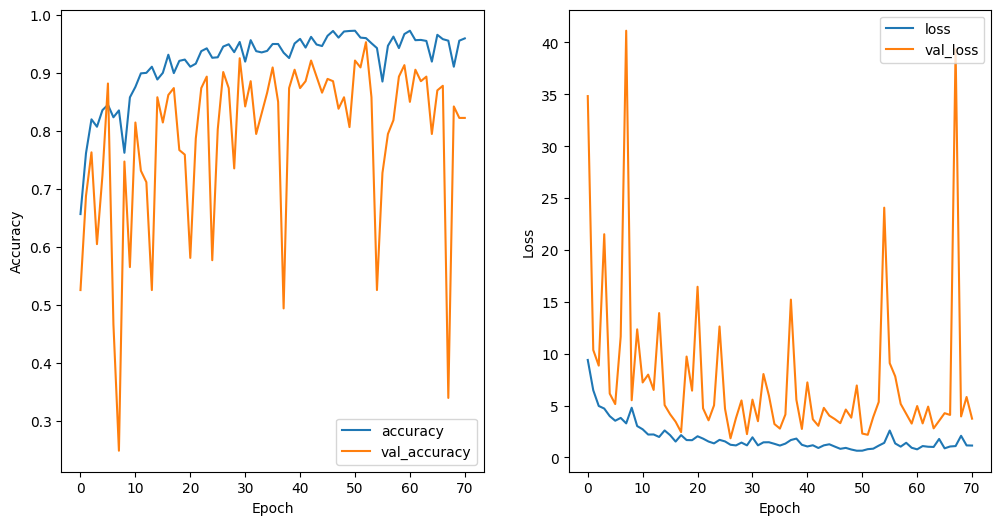

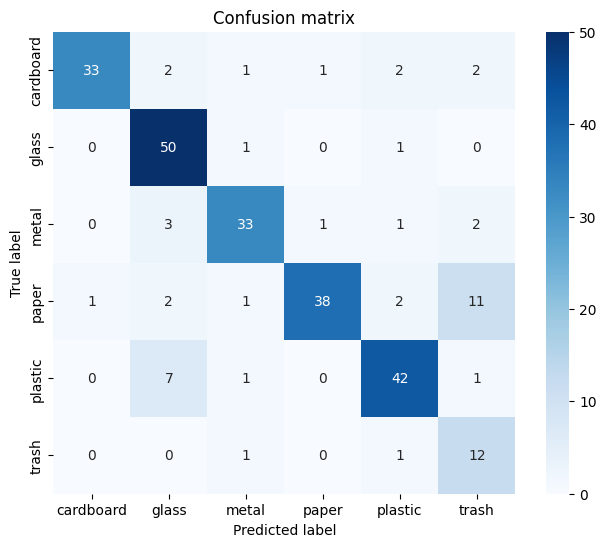

In [36]:
xception_3.evaluate()

In [38]:
IMG_SIZE = (72,72)
xception_4 = MModel('xception_4')
xception_4.set_model(xception_pretrained2(IMG_SIZE,fine_tune_amt=2000))
xception_4.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9       │ (None, 72, 72, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 35, 35,    │        864 │ input_layer_9[0]… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 35, 35,    │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 35, 35,    │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 33, 33,    │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 33, 33,    │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 33, 33,    │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 33, 33,    │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 33, 33,    │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 33, 33,    │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 33, 33,    │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 33, 33,    │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 17, 17,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 17, 17,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 17, 17,    │        512 │ conv2d_12[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_36 (Add)        │ (None, 17, 17,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 17, 17,    │          0 │ add_36[0][0]    

 Total params: 21,387,566 (81.59 MB)

 Trainable params: 21,333,038 (81.38 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [39]:
xception_4.compile(optimizer='adam', loss=weigthed_loss_func, metrics=['accuracy'])
history = xception_4.fit(epochs=300, verbose=1, callbacks=[early_stopping])

(72, 72)
Found 2274 images belonging to 6 classes.
Found 253 images belonging to 6 classes.
Epoch 1/300


/mnt/c/Users/kkiko/Desktop/CAA/aa/CAA_P1/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


72/72 ━━━━━━━━━━━━━━━━━━━━ 39s 279ms/step - accuracy: 0.3571 - loss: 13.7343 - val_accuracy: 0.3636 - val_loss: 33.8479
Epoch 2/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - accuracy: 0.5731 - loss: 9.5240 - val_accuracy: 0.4704 - val_loss: 14.2502
Epoch 3/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 106ms/step - accuracy: 0.6148 - loss: 8.1136 - val_accuracy: 0.5494 - val_loss: 8.3201
Epoch 4/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - accuracy: 0.7362 - loss: 5.8516 - val_accuracy: 0.7115 - val_loss: 7.6490
Epoch 5/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - accuracy: 0.7423 - loss: 5.4450 - val_accuracy: 0.6206 - val_loss: 7.8262
Epoch 6/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - accuracy: 0.7690 - loss: 4.7920 - val_accuracy: 0.3281 - val_loss: 24.7283
Epoch 7/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - accuracy: 0.7551 - loss: 4.8978 - val_accuracy: 0.7510 - val_loss: 5.2093
Epoch 8/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - accuracy: 0.8081 - loss: 3.7530 - val_accuracy: 0

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ -19s -18602435us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/

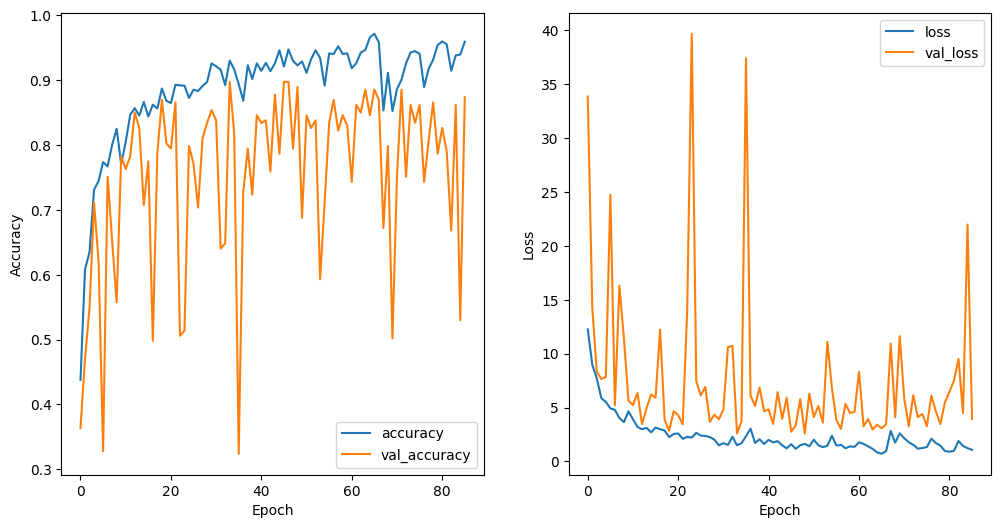

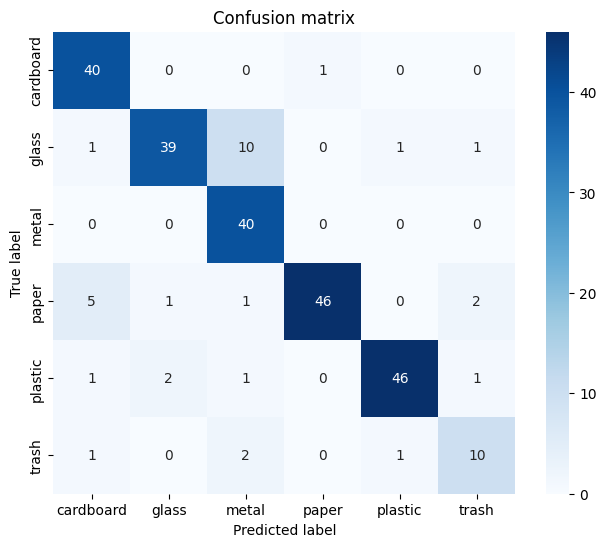

In [40]:
xception_4.evaluate()

In [6]:
xception_5 = MModel('xception_5')
IMG_SIZE = (384,384)
xception_5.set_model(xception_pretrained(IMG_SIZE,fine_tune_amt=2000))
xception_5.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 384, 384,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 191, 191,  │        864 │ input_layer[0][0] │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 191, 191,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 191, 191,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 189, 189,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 189, 189,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 189, 189,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 189, 189,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 189, 189,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 189, 189,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 189, 189,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 189, 189,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 95, 95,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 95, 95,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 95, 95,    │        512 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 95, 95,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 95, 95,    │          0 │ add[0][0]       

 Total params: 21,387,566 (81.59 MB)

 Trainable params: 21,333,038 (81.38 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [ ]:
xception_5.compile(optimizer='adam', loss=weigthed_loss_func, metrics=['accuracy'])
history = xception_5.fit(epochs=300, verbose=1, callbacks=[early_stopping])

(384, 384)
Found 2274 images belonging to 6 classes.
Found 253 images belonging to 6 classes.


/mnt/c/Users/kkiko/Desktop/CAA/aa/CAA_P1/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/300


I0000 00:00:1746498050.927009   54648 service.cc:152] XLA service 0x7f5dd8012530 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746498050.927067   54648 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4080 SUPER, Compute Capability 8.9
2025-05-06 03:20:51.168899: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1746498052.742263   54648 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-05-06 03:20:53.760011: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_12456', 4 bytes spill stores, 4 bytes spill loads

2025-05-06 03:20:53.908226: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_

 1/72 ━━━━━━━━━━━━━━━━━━━━ 1:12:01 61s/step - accuracy: 0.3125 - loss: 9.1820

In [ ]:
xception_5.evaluate()